# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_20newsgroups

sns.set(palette='Set2')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import multivariate_normal

import torch
from torch.utils.data import DataLoader


---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно.
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

$\textbf{Доказательство}:$

$\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n\left(X_i^2 -2X_i \overline{X} + \overline{X}^2\right) = \frac1n\sum\limits_{i=1}^n X_i^2 + \frac1n\sum\limits_{i=1}^n\left(\overline{X}^2\right) - \frac1n\sum\limits_{i=1}^n 2X_i\overline{X} = \overline{X^2} + \overline{X}^2 - 2\frac1n\sum\limits_{i=1}^n X_i\overline{X} = \overline{X^2} + \overline{X}^2 - 2\overline{X}\cdot\overline{X} = \overline{X^2} - \overline{X}^2 = S^2$

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

$\textbf{Решение}:$

Пусть $\mu$ и $\overline{X}$ — среднее и его оценка соответственно, тогда:
$$ \operatorname{E}[S^2] = \operatorname{E}\left[ \frac{1}{n} \sum_{i=1}^n ( X_i - \overline{X} )^2 \right].$$
Добавив и отняв $\mu$, а затем сгрупировав слагаемые, получим:
$$ \operatorname{E}[ S^2 ] = \operatorname{E}\bigg[ \frac{1}{n} \sum_{i=1}^n \big( ( X_i - \mu ) - ( \overline{X} - \mu ) \big)^2 \bigg].$$
Возведём в квадрат и получим:
$$ \operatorname{E}[ S^2 ] = \operatorname{E}\bigg[ \frac{1}{n} \sum_{i=1}^n ( X_i - \mu )^2 - 2 ( \overline{X} - \mu ) \frac{1}{n} \sum_{i=1}^n ( X_i - \mu ) + \frac{n}{n} ( \overline{X} - \mu )^2 \bigg].$$
Заметив, что $\frac{1}{n} \sum_{i=1}^n ( X_i - \mu ) = \overline{X} - \frac{1}{n} ( n \mu )$, получим:
$$ \operatorname{E}[ S^2 ] = \operatorname{E}\bigg[ \frac{1}{n} \sum_{i=1}^n ( X_i - \mu )^2 - ( \overline{X} - \mu )^2 \bigg].$$

Пользуясь тем, что
* $\operatorname{E}[ a + b ] = \operatorname{E}[ a ] + \operatorname{E}[ b ]$ (свойство математического ожидания);
* $\operatorname{E}\left[ \frac{1}{n} \sum_{i=1}^n ( X_i - \mu )^2 \right] = \sigma^2$ — дисперсия;
* $\operatorname{E}\left[ ( \overline{X} - \mu )^2 \right] = \frac{1}{n} \sigma^2$, т.к.
    * $\operatorname{E}\left[ ( \overline{X} - \mu )^2 \right] = \operatorname{E}\big[\big(\frac{1}{n}\sum_{i=1}^n ( X_i - \mu ) \big)^2\big] = \operatorname{E}\big[\frac{1}{n^2}\sum_{i=1}^n ( X_i - \mu )^2 + \frac{2}{n^2}\sum_{i=1,j=1, i<j}^n ( X_i - \mu )( X_j - \mu ) \big]$,
    * $X_i$ и $X_j$ независимые и $\operatorname{E}\big[( X_i - \mu )\big] = 0$, получим окончательно:
    * $\operatorname{E}\big[\sum_{i=1,j=1, i<j}^n ( X_i - \mu )( X_j - \mu ) \big]=\sum_{i=1,j=1, i<j}^n \operatorname{E}\big[( X_i - \mu )\big]\operatorname{E}\big[( X_j - \mu )\big] = 0$,

получим:

$$
\begin{align}
\operatorname{E}[ S^2 ] &= \sigma^2 - \operatorname{E}\big[ ( \overline{X} - \mu )^2 \big] = \sigma^2 - \frac{1}{n} \sigma^2 = \frac{n-1}{n} \sigma^2 < \sigma^2.
\end{align}
$$

Итак, получили, что определение несмещенной оценки не выполнено, а значит, $\textsf{E}[S^2]$ - смещенная оценка.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** $S^2$ - смещенная, $\frac{n}{n-1}S^2$ - несмещенная.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, y), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


**Решение:**

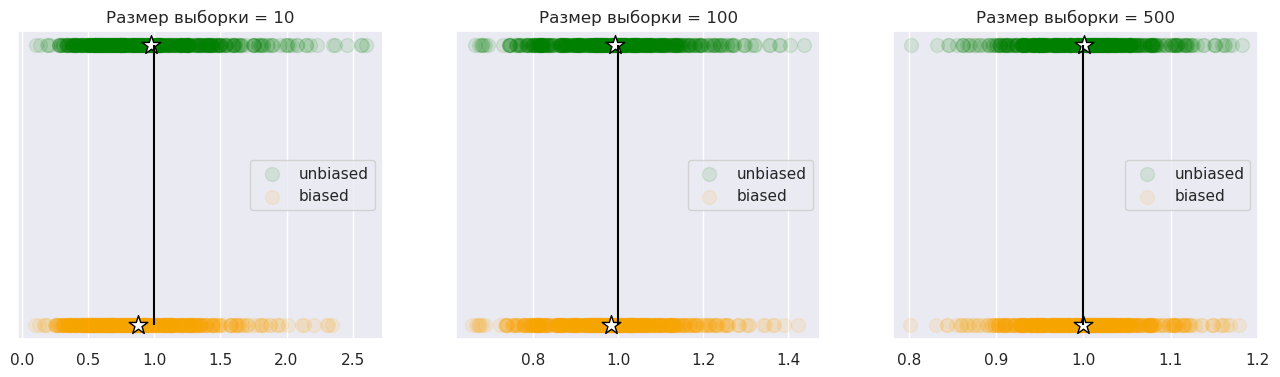

In [ ]:
plt.figure(figsize=(16, 4))

K = 500
sigma = 1
for i, size in enumerate([10, 100, 500]):
  sample = np.random.normal(loc=0, scale=sigma, size=(500, size))
  theta_biased = ((sample - sample.mean(axis=1).reshape((sample.shape[0], 1))) ** 2).mean(axis=1)
  theta_unbiased = size / (size - 1) * ((sample - sample.mean(axis=1).reshape((sample.shape[0], 1))) ** 2).mean(axis=1)

  plt.subplot(1, 3, i + 1)
  plt.scatter(theta_unbiased, np.zeros(K) + 1,
              alpha=0.1, s=100, color='green', label="unbiased")
  plt.scatter(theta_unbiased.mean(), 1, marker='*', s=200,
              color='w', edgecolors='black')

  plt.scatter(theta_biased, np.zeros(K) + 0,
              alpha=0.1, s=100, color='orange', label="biased")
  plt.scatter(theta_biased.mean(), 0, marker='*', s=200,
              color='w', edgecolors='black')


  plt.vlines(1, 0, 1, color='black')
  plt.title(f'Размер выборки = {size}')
  plt.yticks([])
  plt.legend()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

**Решение:**

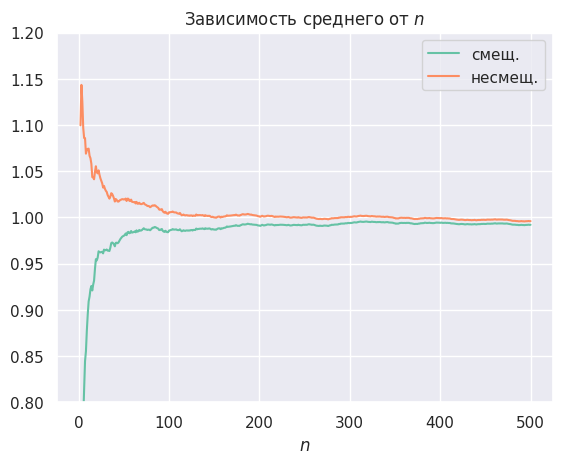

In [3]:
def calculate_statistics(sample):
    N = sample.shape[1]
    sum_values = np.cumsum(sample, axis=1) / np.arange(1, N + 1)

    temp = np.tile(np.arange(1, N + 1), (N, 1))
    temp = np.tile(temp, (N, 1, 1))

    diff = sample - sum_values.T[:, np.newaxis, :]
    squared_diff_cumsum = np.cumsum(diff**2, axis=2) / temp
    biased = np.mean(np.einsum('ijk->i', squared_diff_cumsum))

    cummult = np.cumsum(np.arange(2, N + 1)) / np.cumsum(np.arange(1, N))
    unbiased = cummult * biased

    return biased, unbiased

K = 500
N = 500
sigma = 1
sample = np.random.normal(0, sigma, size=(K, N))

biased, unbiased = calculate_statistics(sample)

plt.plot(np.arange(1, N + 1), biased)
plt.plot(np.arange(2, N + 1), unbiased)
plt.ylim(0.8, 1.2)
plt.legend(['смещ.', 'несмещ.'])
plt.xlabel('$n$')
plt.title('Зависимость среднего от $n$')
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок?

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:**

* Оценка удовлетворяет свойству несмещенности, если матожидание оценки равно оцениваемому параметру. Эксперименты подтвердили свойство несмещенности данных оценок. Заметим, что при $n\rightarrow\inf\hookrightarrow\frac{n}{n-1}\rightarrow 1$, а потому сходились к истинному значению параметра обе оценки, когда как при малых $n$ ошибка несмещенной оказалась существенной.
* В силу того, что в лабораторных часто невозможно за ограниченное время получить большое количество измерений, смещение оценки может быть велико. Кроме того из графика можем видеть разные "виды сходимости": в случае несмещенной мы стремимся сверху, получая переоценку, а в случае смещенной - снизу, получая недооценку. А в погрешности лучше получить недооценку, чем переоценку.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.

![news.jpg](attachment:news.jpg)



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [ ]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [ ]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [ ]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [ ]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [ ]:
# дополнительно разделим обучающую еще и на валидационную
train = pd.DataFrame(data_train, columns=['data', 'target'])
test = pd.DataFrame(data_test, columns=['data', 'target'])
train, valid = train_test_split(train, test_size=0.3)

Посчитаем количество сообщений каждого класса.

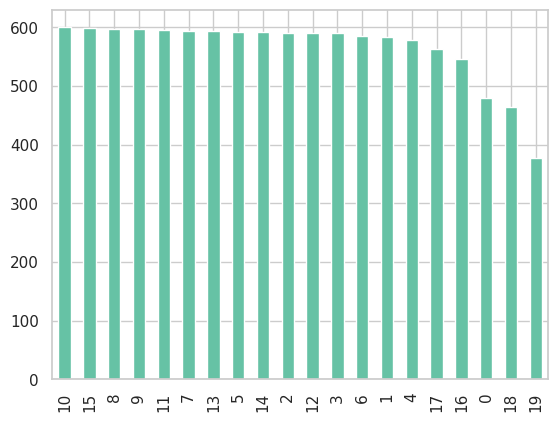

In [ ]:
counts = pd.value_counts(data_train["target"], sort=True)
with sns.axes_style('whitegrid'):
  counts.plot(kind='bar')

Видим, что данные распределены равномерно. Больше всего записей про хоккей.

Интересно будет проверить, различаются ли как-то длины записей в зависимости от темы.

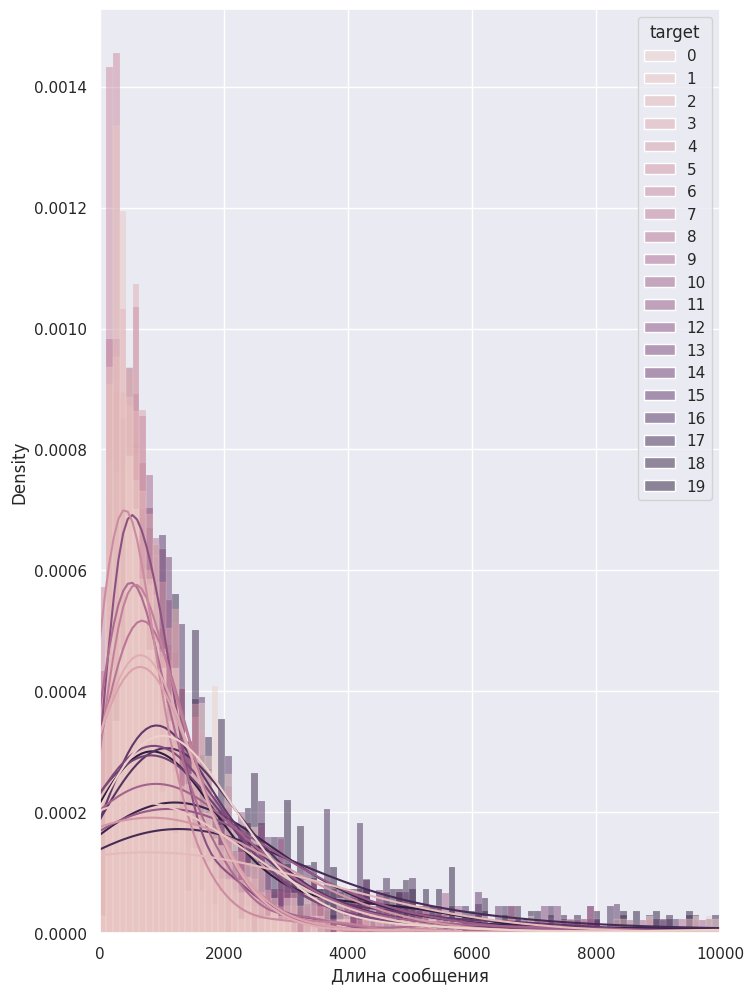

In [ ]:
plt.figure(figsize=(8, 12))
sns.histplot(
    x=train["data"].apply(len),
    hue=train["target"],
    stat="density",
    kde=True,
    common_norm=False,
    kde_kws=dict(gridsize=1000),
)
plt.xlim((0, 10000))
plt.xlabel("Длина сообщения");

Нельзя сказать, что есть однозначная зависимость между темой и длиной текста. Однако заметки, связанные с компьютерными технологиями значительно короче прочих (их индексы как раз идут до 5).

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

**Ответ:** \
- если каждый текст представить вектором, то получим пространство большой размерности, а как известно, в таких пространствах рассстояния неинформативны, т.е. KNN не даст желаемого результата.



Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

Для преобразования текстовых сообщений воспользуемся `CounterVectorizer`, работающий по принципу мешка слов. Он имеет следующие гиперпараметры:

* `max_df` &mdash; максимальная доля сообщений, в которых может встречатся слово из словаря, то есть в словарь не включаются слишком **частые** слова, что помогает бороться со стоп-словами;
* `min_df` &mdash; минимальная доля сообщений, в которых может встречатся слово из словаря, то есть в словарь не включаются слишком **редкие** слова;
* `max_features` &mdash; максимальное возможное количество выбранных слов, они выбираются среди наиболее частых;
* `stop_words` &mdash; можно просто взять и задать стоп-слова, которые не будут добавлены в словарь ни при каких обстоятельствах.

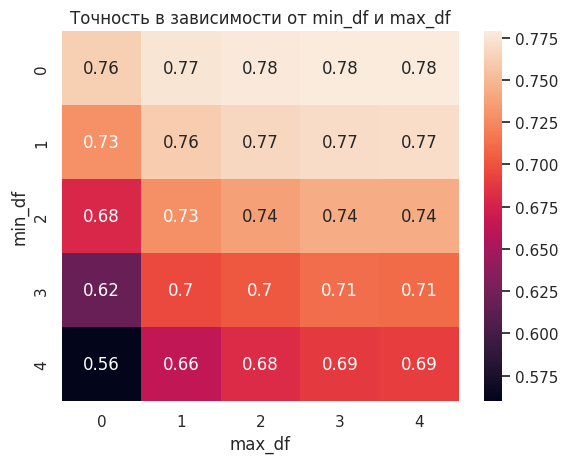

In [ ]:
min_df = [0.002, 0.004, 0.006, 0.008, 0.01]
max_df = [0.02, 0.04, 0.06, 0.08, 0.1]
grid = np.zeros((5, 5))

for i, min in enumerate(min_df):
    for j, max in enumerate(max_df):
        vectorizer = CountVectorizer(min_df=min, max_df=max)
        vec_data_train = vectorizer.fit_transform(train['data']).toarray()
        vec_data_val = vectorizer.transform(valid['data']).toarray()

        multinomial_nb = MultinomialNB()
        multinomial_nb.fit(vec_data_train, train['target'])
        predictions = multinomial_nb.predict(vec_data_val)
        grid[i, j] = accuracy_score(valid['target'], predictions)

s = sns.heatmap(grid, annot=True)
s.set(xlabel='max_df', ylabel='min_df', title='Точность в зависимости от min_df и max_df')
plt.show()

Видим, что лучший результат `min_df = 0.002`, `max_df = 0.08` (см. самую светлую клетку).

Теперь будем варьировать значение `max_features`.

In [ ]:
# None == берем максимально возможное количество features
max_features = [1000, 2000, 4000, 8000, None]
min_df = 0.002
max_df = 0.08

accuracies = []

for i, features in enumerate(max_features):
  vectorizer = CountVectorizer(min_df=min, max_df=max, max_features=features)
  vec_data_train = vectorizer.fit_transform(train.data).toarray()
  vec_data_val = vectorizer.transform(valid.data).toarray()

  multinomial_nb = MultinomialNB(alpha=1)
  multinomial_nb.fit(vec_data_train, train.target)
  predictions = multinomial_nb.predict(vec_data_val)
  accuracies.append(accuracy_score(valid.target, predictions))

In [ ]:
accuracies

[0.6477172312223859,
 0.6904270986745213,
 0.6904270986745213,
 0.6904270986745213,
 0.6904270986745213]

Возьмем `max_features = 4000`.

Посчитайте качество на тестовой выборке.

In [ ]:
min_df = 0.002
max_df = 0.08
max_features = 4000

vectorizer = CountVectorizer(min_df=min, max_df=max, max_features=max_features)
vec_data_train = vectorizer.fit_transform(train.data).toarray()
vec_data_test = vectorizer.transform(test.data).toarray()

# Обучаем модель
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, train.target)
predictions = multinomial_nb.predict(vec_data_test)
print(f"Точность: {accuracy_score(test.target, predictions) :.3}")

Точность: 0.603


Видим, что точность упала на $\sim 10\%$. Учитывая, что наш классификатор предсказывает 1 из 20 классов, т.е. не бинарный, то точность в $60\%$ можно считать приемлемой.

Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import OneHotEncoder

class TextClassifier(nn.Module):
    def __init__(self, num_categories):
        super(TextClassifier, self).__init__()
        self.linear1 = nn.Linear(4000, 256)
        # self.relu1 = nn.Sigmoid()
        # self.linear2 = nn.Linear(512, 256)
        self.relu2 = nn.Sigmoid()
        self.linear3 = nn.Linear(256, num_categories)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.linear1(x)
        # x = self.relu1(x)
        # x = self.linear2(x)
        x = self.relu2(x)
        x = self.linear3(x)
        x = self.softmax(x)
        return x

num_categories = len(data_train['target_names'])

model = TextClassifier(num_categories)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Архитектура модели
print(model)

TextClassifier(
  (linear1): Linear(in_features=4000, out_features=256, bias=True)
  (relu2): Sigmoid()
  (linear3): Linear(in_features=256, out_features=20, bias=True)
  (softmax): Softmax(dim=1)
)


Именно такая архитектура была выбрана опытным путем в силу быстроты работы и точности.

In [ ]:
# предобработка
vectorizer = CountVectorizer(max_features=4000)
vec_data_train = vectorizer.fit_transform(train.data).toarray()
vec_data_test = vectorizer.transform(test.data).toarray()
vec_data_val = vectorizer.transform(valid.data).toarray()

# переведем текст в вектор
encoder = OneHotEncoder()
enc_data_train = encoder.fit_transform(train.target.values.reshape(-1, 1)).toarray()
enc_data_test = encoder.transform(test.target.values.reshape(-1, 1)).toarray()
enc_data_val = encoder.transform(valid.target.values.reshape(-1, 1)).toarray()

# тензоры PyTorch
vec_data_trian_torch = torch.tensor(vec_data_train, dtype=torch.float32)
enc_data_train_torch = torch.tensor(enc_data_train, dtype=torch.float32)
vec_data_test_torch = torch.tensor(vec_data_test, dtype=torch.float32)
enc_data_test_torch = torch.tensor(enc_data_test, dtype=torch.float32)
vec_data_val_torch = torch.tensor(vec_data_val, dtype=torch.float32)
enc_data_val_torch = torch.tensor(enc_data_val, dtype=torch.float32)

# Для подачи данных в модель
train_loader = DataLoader(TensorDataset(vec_data_trian_torch, enc_data_train_torch), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(vec_data_test_torch, enc_data_test_torch), batch_size=64, shuffle=False)
val_loader = DataLoader(TensorDataset(vec_data_val_torch, enc_data_val_torch), batch_size=64, shuffle=False)

In [ ]:
# Обучение модели на 10 эпохах
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for data, target in val_loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            total_correct += (predicted == torch.argmax(target, dim=1)).sum().item()
            total_samples += target.size(0)

        accuracy = total_correct / total_samples
        print(f'Epoch {epoch+1}, Valid Accuracy: {accuracy}')

Epoch 1, Valid Accuracy: 0.4603829160530191
Epoch 2, Valid Accuracy: 0.622680412371134
Epoch 3, Valid Accuracy: 0.6412371134020619
Epoch 4, Valid Accuracy: 0.6438880706921944
Epoch 5, Valid Accuracy: 0.6518409425625921
Epoch 6, Valid Accuracy: 0.6518409425625921
Epoch 7, Valid Accuracy: 0.6521354933726068
Epoch 8, Valid Accuracy: 0.6916053019145803
Epoch 9, Valid Accuracy: 0.7007363770250368
Epoch 10, Valid Accuracy: 0.69720176730486


Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

In [ ]:
model.eval()
with torch.no_grad():
  total_correct = 0
  total_samples = 0
  for data, target in test_loader:
      output = model(data)
      _, predicted = torch.max(output, 1)
      total_correct += (predicted == torch.argmax(target, dim=1)).sum().item()
      total_samples += target.size(0)

  accuracy = total_correct / total_samples
  print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.6386086032926181


Получили следующий результат:
* Байесовский классификтор $\sim 60\%$
* NN $\sim 63\%$

Такая небольшая разница не позволяет утверждать, что NN лучше другой модели.

**Вывод**:
1. Видно, что нейронная сеть дает лучшие предсказания на тестовой выборке, что неудивительно, так как это более гибкая сущность, с возможностью настройки многих параметров.
2. Разница в $\sim 3\%$ объясняется тем, что модель крайне простая. Уверен, что если пользоваться моделями, находящимися в открытом доступе, можно получить более высокую точность.
3. Удивительно другое: наивный байсовский классификатор мало отстает по точности предсказания! Это еще раз напоминает о том, что нейронные сети -- over kill для некоторых задач.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова.

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


**Решение**. (см. фото)

